## The multi-task lasso allows to fit multiple regression problems jointly enforcing the selected features to be the same across tasks.

In [3]:
import numpy as np

### Generate some 2D coefficients with sine waves with random frequency and phase

In [4]:
rng = np.random.RandomState(42)

n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5

# [task#40, feat#30]
coef = np.zeros((n_tasks, n_features))

# [task#40]
times = np.linspace(0, 2 * np.pi, n_tasks)


In [5]:
print('Shape of coef', coef.shape)
print('Shape of times', times.shape)

Shape of coef (40, 30)
Shape of times (40,)


In [6]:
# Lets construct a sin wave # shape (40,) # ie: 40 points 
np.sin((1.0 + rng.randn(1)) * times + 3 * rng.randn(1))

array([-0.4030004 , -0.17278973,  0.06741912,  0.30372688,  0.52246001,
        0.7109619 ,  0.85832521,  0.95602303,  0.99840224,  0.98301064,
        0.91073883,  0.78576871,  0.61533144,  0.40928909,  0.17956394,
       -0.06055137, -0.29716298, -0.51657977, -0.70610557, -0.85477379,
       -0.95398202, -0.99798973, -0.98425051, -0.91355933, -0.79000664,
       -0.62074158, -0.41555839, -0.18632964,  0.05368076,  0.29058501,
        0.51067506,  0.70121579,  0.85118189,  0.95189582,  0.99752996,
        0.98544376,  0.91633657,  0.79420716,  0.62612232,  0.42180801])

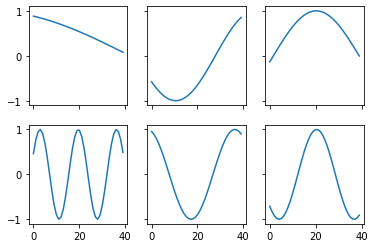

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True)

for i in ax.flatten():
    i.plot(np.sin((1.0 + rng.randn(1)) * times + 3 * rng.randn(1)));


In [7]:
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1.0 + rng.randn(1)) * times + 3 * rng.randn(1))

In [8]:
coef.shape

(40, 30)

In [9]:
# [samples#100, feat#30]
X = rng.randn(n_samples, n_features)

# [samples#100, feat#30] . [task#40, feat#30].T  ==> [samples#100, task#40]
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

### Fit a Lasso Model and save its coefs

In [40]:
from sklearn.linear_model import Lasso

l = Lasso()
task_1 = (Y.T)[0]                    #(Y.T)[0] == Y[:,0]
l.fit(X,task_1)

# There are 30-features so, the coef will be 30

print('Shape of X',X.shape)
print('Shape of y',task_1.shape)
print('Shape of coef',l.coef_.shape)

Shape of X (100, 30)
Shape of y (100,)
Shape of coef (30,)


In [31]:
from sklearn.linear_model import Lasso

                                    #YTranspose : #[100, 40] --> #[40, 100]      
lassoModels = [Lasso().fit(X, y) for y in Y.T]

lasso_coefs = np.array([lasso.coef_ for lasso in lassoModels])

# we have 40 tasks -- for each task we are saving the coef 
# so total 40rows ,30 cols  --> [40, 30] will be the shape of coef
print('Shape of coefs', lasso_coefs.shape)

Shape of coefs (40, 30)


### Fit a MultiTaskLasso model and save its coefs

In [11]:
from sklearn.linear_model import MultiTaskLasso

multi_task_lasso = MultiTaskLasso().fit(X, Y)

multi_task_lasso_coefs = multi_task_lasso.coef_

# we have 40 task 
# our feature matrix, X , has as shape [100, 30]
# coef shape will be [40, 30]
print('Shape of coefs', multi_task_lasso_coefs.shape)

Shape of coefs (40, 30)


## PLOTS 


`matplotlib.pyplot.spy`  -- Plot the sparsity pattern of a 2D array.
This visualizes the non-zero values of the array.

matplotlib.pyplot.spy(Z, precision=0, ... )

Z is the 2D - array to be plotted

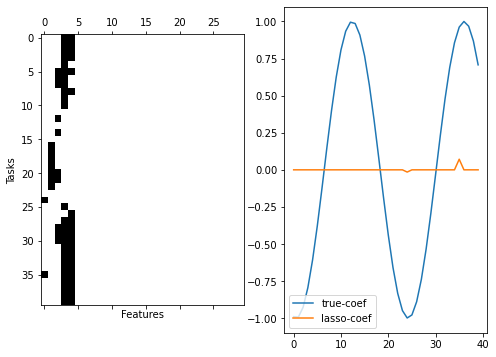

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))


plt.subplot(121)
plt.spy(lasso_coefs);

plt.xlabel('Features')
plt.ylabel('Tasks')

plt.subplot(122)
select_a_feat = 0
plt.plot(coef[:, select_a_feat], label='true-coef')
plt.plot(lasso_coefs[:, select_a_feat], label='lasso-coef')
plt.legend()

plt.show()

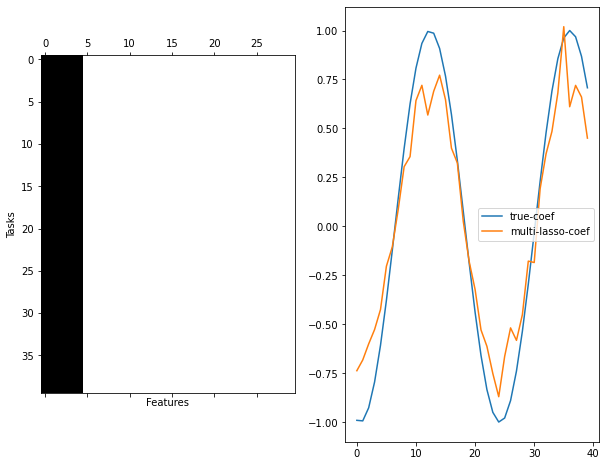

In [13]:


plt.show()


plt.figure(figsize=(10,8))


plt.subplot(121)
plt.spy(multi_task_lasso_coefs);

plt.xlabel('Features')
plt.ylabel('Tasks')

plt.subplot(122)
select_a_feat = 0
plt.plot(coef[:, select_a_feat], label='true-coef')
plt.plot(multi_task_lasso_coefs[:, select_a_feat], label='multi-lasso-coef')
plt.legend()

plt.show()